In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [11]:
X,y=load_data()
# print ('The first element of X is: ', X[0])
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


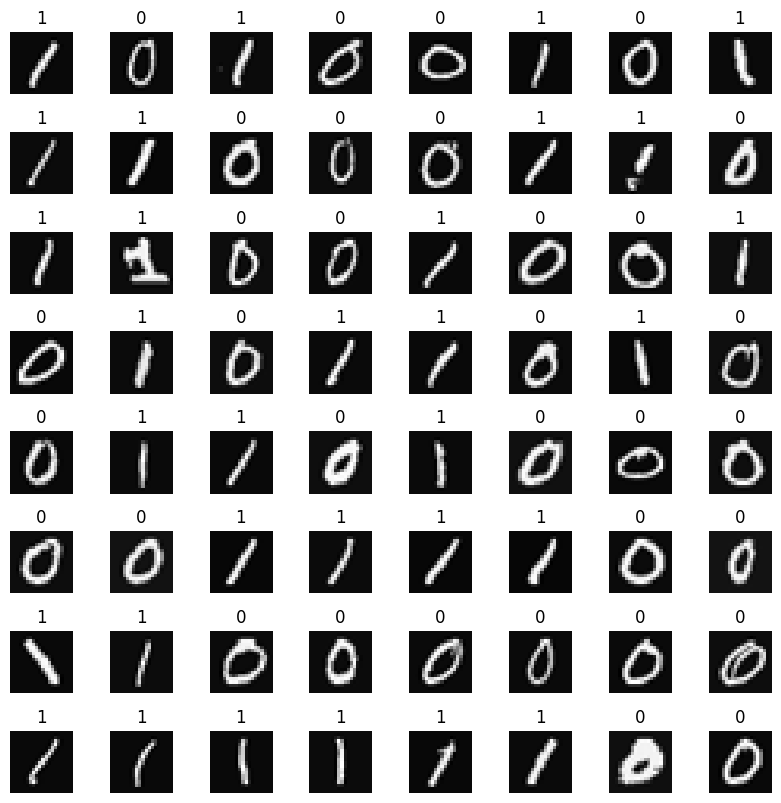

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [13]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(units=25, activation="sigmoid"),
    tf.keras.layers.Dense(units=15,activation="sigmoid"),
    tf.keras.layers.Dense(units=1,activation="sigmoid")
], name="my_model")

In [14]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [15]:
[layer1, layer2, layer3] = model.layers

In [16]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [17]:
# print(model.layers[2].weights)

In [18]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 1ms/step - loss: 0.6334
Epoch 2/20
32/32 [==============================] - 0s 968us/step - loss: 0.4890
Epoch 3/20
32/32 [==============================] - 0s 1000us/step - loss: 0.3354
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2243
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1586
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1199
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0954
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0783
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0660
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0569
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0497
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0440
Epoch 13/20
32/32 [=========================

In [19]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
# prediction = model.predict(X[500].reshape(1,400))  # a one
# print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 91ms/step
 predicting a zero: [[0.02098163]]


In [20]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 0


In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()


1/1 [==============================] - 0s 21ms/step
